In [30]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
print()

# Common imports
import numpy as np
import os
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve, auc

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.tree import export_text

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


#### Load Train & Test Data

In [2]:
def convertDfTo1DArray(X):
    array = X.to_numpy().flatten()
    return array;

In [3]:
def convertDfToArray(X):
    array = X.to_numpy()
    return array;

In [4]:
trainData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_train_all.csv')
trainLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_train_all.csv')
testData=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/x_test_all.csv')
testLabel=pd.read_csv('/Users/movina/Desktop/Semester2/F21DLCW/OneDrive/y_test_all.csv')
trainDataArray = convertDfToArray(trainData)
trainLabelArray = convertDfTo1DArray(trainLabel)
testDataArray = convertDfToArray(testData)
testLabelArray = convertDfTo1DArray(testLabel)

In [5]:
pca= PCA(n_components = 2)
train_Reduced= pca.fit_transform(trainData)
test_Reduced= pca.fit_transform(testData)
train_Reduced_df = pd.DataFrame(train_Reduced)
test_Reduced_df = pd.DataFrame(test_Reduced)

In [6]:
# Calculate the correlation between X and y
# Assuming X is your data and y is your labels
correlation_matrix = np.corrcoef(trainDataArray, trainLabelArray, rowvar=False)
correlations = correlation_matrix[:-1, -1] 
correlation_threshold = 0.2  # Define your correlation threshold
selected_feature_indices = np.where(np.abs(correlations) > correlation_threshold)[0]
# Sort the selected features by the absolute correlation coefficient
sorted_feature_indices = np.argsort(np.abs(correlations[selected_feature_indices]))[::-1]
# Select the top 10 features based on their absolute correlation
top_10_indices = selected_feature_indices[sorted_feature_indices][:50]
# Create a new array with the top 10 features
new_trainCorr = trainDataArray[:, top_10_indices ]
new_testCorr = testDataArray[:, top_10_indices ]
new_trainCorr_df = pd.DataFrame(new_trainCorr)
new_testCorr_df = pd.DataFrame(new_testCorr)
new_trainCorr.shape
new_testCorr.shape

(3090, 50)

# Random Forest

In [13]:
# Load the Iris dataset
#iris = load_iris()
#X, y = iris.data, iris.target

# Split the dataset into a training and a testing set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
# You can specify the number of trees (n_estimators) and other hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data -- Full Data
rf_classifier.fit(trainDataArray, trainLabelArray)

# Make predictions on the test data-- Full Data
y_pred = rf_classifier.predict(testDataArray)
# Predict probabilities or scores on the test set
y_scores = rf_classifier.predict_proba(testDataArray)  # Use the probability of the positive class

# Train the classifier on the training data -- PCA reduced Data
rf_classifier.fit(train_Reduced, trainLabelArray)

# Make predictions on the test data-- PCA reduced Data
y_pred_pca = rf_classifier.predict(test_Reduced)
# Predict probabilities or scores on the test set
y_scores_pca = rf_classifier.predict_proba(test_Reduced)  # Use the probability of the positive class

# Train the classifier on the training data -- Correlation
rf_classifier.fit(new_trainCorr, trainLabelArray)

# Make predictions on the test data-- Correlation
y_pred_corr = rf_classifier.predict(new_testCorr)
# Predict probabilities or scores on the test set
y_scores_corr = rf_classifier.predict_proba(new_testCorr)  # Use the probability of the positive class

#### Accuracy

In [14]:
# Evaluate the model's accuracy
def calculateAccuracy(X,y,label):
    accuracy = accuracy_score(X, y)
    print(f"Accuracy-{label}: {accuracy}")
    
calculateAccuracy(testLabelArray, y_pred, "Full Data")
calculateAccuracy(testLabelArray, y_pred_pca, "PCA Data")
calculateAccuracy(testLabelArray, y_pred_corr, "Correlation")

Accuracy-Full Data: 0.7718446601941747
Accuracy-PCA Data: 0.2682847896440129
Accuracy-Correlation: 0.643042071197411


#### Precison

In [110]:
# Evaluate the model's precison
def calculatePrecision(X,y,label):
    # For precision per class (no averaging)
    precision_per_class = precision_score(X,y, average=None)
    print(f"Precision per class-{label}: {precision_per_class}")

    # For micro-averaged precision
    micro_precision = precision_score(X,y, average='micro')
    print(f"Micro Precision-{label}: {micro_precision}")

    # For macro-averaged precision
    macro_precision = precision_score(X,y, average='macro')
    print(f"Macro Precision-{label}: {macro_precision}")

    # For weighted-averaged precision
    weighted_precision = precision_score(X,y, average='weighted')
    print(f"Weighted Precision-{label}: {weighted_precision}")

calculatePrecision(testLabelArray, y_pred,"Full Data")
calculatePrecision(testLabelArray, y_pred_pca, "PCA Data")
calculatePrecision(testLabelArray, y_pred_corr, "Correlation")

Precision per class-Full Data: [0.84615385 0.73498233 0.81723238 0.75052411 0.81591264 0.90909091
 0.69565217 0.89473684 0.63803681 0.73333333]
Micro Precision-Full Data: 0.7718446601941747
Macro Precision-Full Data: 0.783565536806707
Weighted Precision-Full Data: 0.7772371725734799
Precision per class-PCA Data: [0.         0.36848793 0.28834356 0.21582734 0.33500838 0.
 0.03076923 0.01408451 0.03508772 0.07462687]
Micro Precision-PCA Data: 0.2682847896440129
Macro Precision-PCA Data: 0.13622355232461675
Weighted Precision-PCA Data: 0.2638804803471012
Precision per class-Correlation: [1.         0.68478261 0.69331742 0.75757576 0.57864358 0.75
 0.44230769 0.34666667 0.48251748 0.22857143]
Micro Precision-Correlation: 0.643042071197411
Macro Precision-Correlation: 0.5964382637412626
Weighted Precision-Correlation: 0.6454375861350296


#### Recall

In [15]:
# Evaluate the model's precison
def calculateRecall(X,y,label):
    # For recall per class (no averaging)
    recall_per_class = recall_score(X,y, average=None)
    print(f"Recall per class-{label}: {recall_per_class}")

    # For micro-averaged recall
    micro_recall = recall_score(X,y, average='micro')
    print(f"Micro Recall-{label}: {micro_recall}")

    # For macro-averaged recall
    macro_recall = recall_score(X,y, average='macro')
    print(f"Macro Recall-{label}: {macro_recall}")

    # For weighted-averaged recall
    weighted_recall = recall_score(X,y, average='weighted')
    print(f"Weighted Recall-{label}: {weighted_recall}")

calculateRecall(testLabelArray, y_pred,"Full Data")
calculateRecall(testLabelArray, y_pred_pca, "PCA Data")
calculateRecall(testLabelArray, y_pred_corr, "Correlation")

Recall per class-Full Data: [0.18333333 0.86666667 0.83466667 0.79555556 0.79242424 0.5
 0.53333333 0.28333333 0.69333333 0.48888889]
Micro Recall-Full Data: 0.7718446601941747
Macro Recall-Full Data: 0.5971535353535354
Weighted Recall-Full Data: 0.7718446601941747
Recall per class-PCA Data: [0.         0.40277778 0.31333333 0.2        0.3030303  0.
 0.02222222 0.01666667 0.04       0.05555556]
Micro Recall-PCA Data: 0.2682847896440129
Macro Recall-PCA Data: 0.1353585858585859
Weighted Recall-PCA Data: 0.2682847896440129
Recall per class-Correlation: [0.08333333 0.7        0.77466667 0.77777778 0.60757576 0.2
 0.25555556 0.43333333 0.46       0.17777778]
Micro Recall-Correlation: 0.643042071197411
Macro Recall-Correlation: 0.44700202020202023
Weighted Recall-Correlation: 0.643042071197411


#### F1-Score

In [16]:
# Evaluate the model's F1Score
def calculateF1Score(X,y,label):
    # For F1Score per class (no averaging)
    F1Score_per_class = f1_score(X,y, average=None)
    print(f"F1Score per class-{label} {F1Score_per_class}")

    # For micro-averaged F1Score
    micro_F1Score = f1_score(X,y, average='micro')
    print(f"Micro F1Score-{label} {micro_F1Score}")

    # For macro-averaged F1Score
    macro_F1Score = f1_score(X,y, average='macro')
    print(f"Macro F1Score-{label} {macro_F1Score}")

    # For weighted-averaged F1Score
    weighted_F1Score = f1_score(X,y, average='weighted')
    print(f"Weighted F1Score-{label} {weighted_F1Score}")

calculateF1Score(testLabelArray, y_pred, "Full Data")
calculateF1Score(testLabelArray, y_pred_pca, "PCA Data")
calculateF1Score(testLabelArray, y_pred_corr, "Correlation")


F1Score per class-Full Data [0.30136986 0.79541109 0.82585752 0.77238403 0.80399693 0.64516129
 0.60377358 0.43037975 0.66453674 0.58666667]
Micro F1Score-Full Data 0.7718446601941746
Macro F1Score-Full Data 0.6429537462575107
Weighted F1Score-Full Data 0.7636681872831463
F1Score per class-PCA Data [0.         0.3848706  0.30031949 0.20761246 0.31821798 0.
 0.02580645 0.01526718 0.03738318 0.06369427]
Micro F1Score-PCA Data 0.2682847896440129
Macro F1Score-PCA Data 0.1353171601001273
Weighted F1Score-PCA Data 0.2654933641296852
F1Score per class-Correlation [0.15384615 0.69230769 0.73173804 0.76754386 0.59275684 0.31578947
 0.32394366 0.38518519 0.47098976 0.2       ]
Micro F1Score-Correlation 0.643042071197411
Macro F1Score-Correlation 0.46341006596601053
Weighted F1Score-Correlation 0.6320297593693686


#### Area Under the ROC Curve (AUC-ROC):

ROC-AUC Scores for Each Class (Full Data):
[0.9390181518151816, 0.9617085677449602, 0.9654467236467237, 0.9221388888888888, 0.9545454545454546, 0.9992491749174917, 0.9772203703703704, 0.9795599559955995, 0.9809705215419501, 0.8343981481481481]
FP(705):
TP(2385):
Weighted Average AUC (Full Data): 0.951425595761477


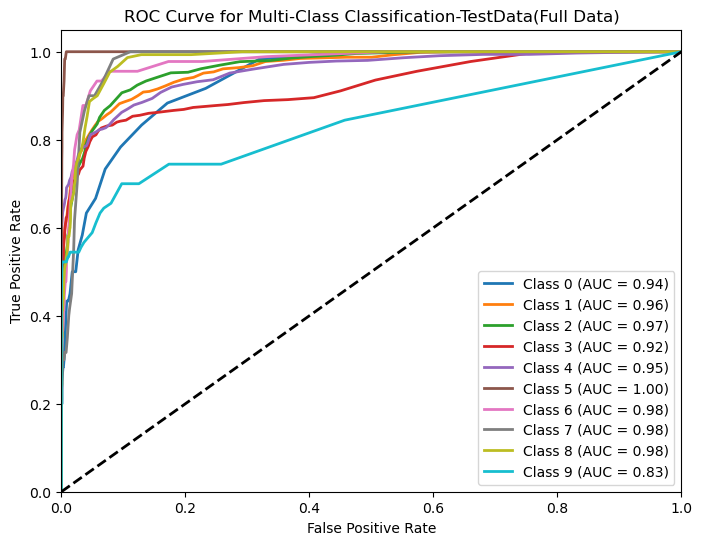

ROC-AUC Scores for Each Class (PCA Data):
[0.5361056105610561, 0.6701535396155649, 0.5590783475783475, 0.6231898148148147, 0.6036435341064971, 0.4918756875687569, 0.5254166666666666, 0.4636001100110011, 0.5545453514739229, 0.5899833333333333]
FP(2261):
TP(829):
Weighted Average AUC (PCA Data): 0.561759199572996


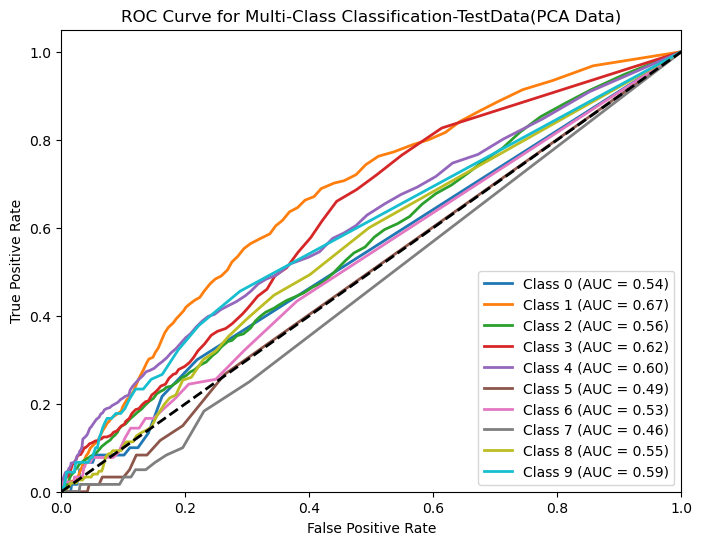

ROC-AUC Scores for Each Class (Correlation):
[0.8679510451045105, 0.916986345522738, 0.935891168091168, 0.9572819865319866, 0.8544581618655692, 0.9602557755775578, 0.8906481481481483, 0.9114466446644665, 0.9589047619047619, 0.9259962962962964]
FP(1103):
TP(1987):
Weighted Average AUC (Correlation): 0.9179820333707205


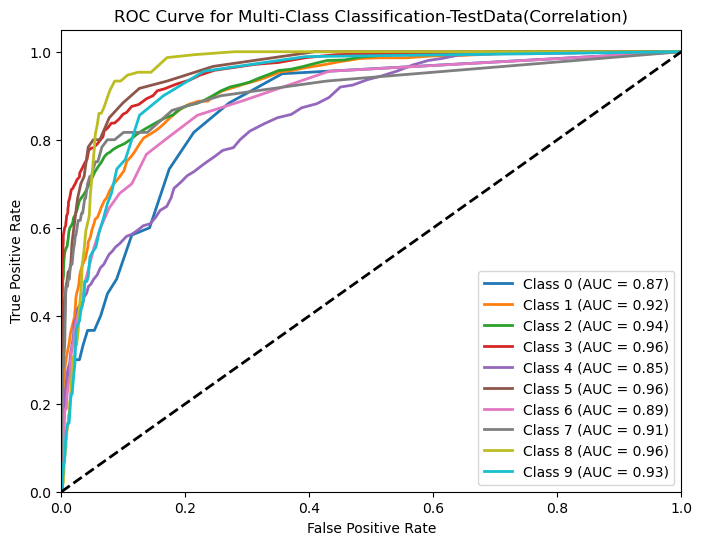

In [23]:
# Evaluate the model's AUCROCScore
def calculateAUCROCScore(y_scores,label):
    # Use the probability of the positive class
    # Calculate the ROC-AUC score using the OvR strategy
    roc_auc_scores = []
    fpr_dict = {}
    tpr_dict = {}
    roc_auc_dict = {}
    for class_idx in range(rf_classifier.n_classes_):
        binary_true = (testLabelArray == class_idx)
        y_scores_class = y_scores[:, class_idx]
        fpr, tpr, _ = roc_curve(binary_true, y_scores_class)
        roc_auc = roc_auc_score(binary_true, y_scores[:, class_idx])
        roc_auc_scores.append(roc_auc)
        
        fpr_dict[class_idx] = fpr
        tpr_dict[class_idx] = tpr
        roc_auc_dict[class_idx] = roc_auc

    # You can compute a weighted average if needed
    weighted_average_auc = sum(roc_auc_scores) / len(roc_auc_scores)
    conf_matrix = confusion_matrix(testLabelArray, np.argmax(y_scores, axis=1))
    TP = np.diag(conf_matrix).sum()
    FP = conf_matrix.sum() - TP
    print(f"ROC-AUC Scores for Each Class ({label}):")
    print(roc_auc_scores)
    print(f"FP({FP}):")
    print(f"TP({TP}):")
    print(f"Weighted Average AUC ({label}): {weighted_average_auc}")
    # Plot the ROC curves for each class
    plt.figure(figsize=(8, 6))
    for class_idx in range(rf_classifier.n_classes_):
        plt.plot(fpr_dict[class_idx], tpr_dict[class_idx], lw=2, label=f'Class {class_idx} (AUC = {roc_auc_dict[class_idx]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Multi-Class Classification-TestData({label})')
    plt.legend(loc='lower right')
    plt.show()


calculateAUCROCScore(y_scores, "Full Data")
calculateAUCROCScore(y_scores_pca, "PCA Data")
calculateAUCROCScore(y_scores_corr, "Correlation")

#### Visualizing Individual Decision Trees

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.000167274 to fit



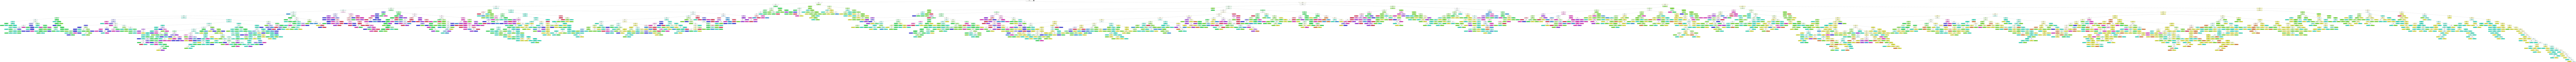

In [10]:
# Export a single decision tree from the Random Forest
rf_classifier.fit(new_trainCorr, trainLabelArray)
tree = rf_classifier.estimators_[0]
# Set the dpi (dots per inch) parameter for image resolution
dpi = 100000  # Adjust this value as needed
# Visualize the decision tree
dot_data = export_graphviz(tree, out_file=None, 
                           filled=True, rounded=True, 
                           special_characters=True, 
                           feature_names=new_trainCorr_df.columns)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_dpi(dpi)  # Set the image resolution
Image(graph.create_png())

#### Feature Importance

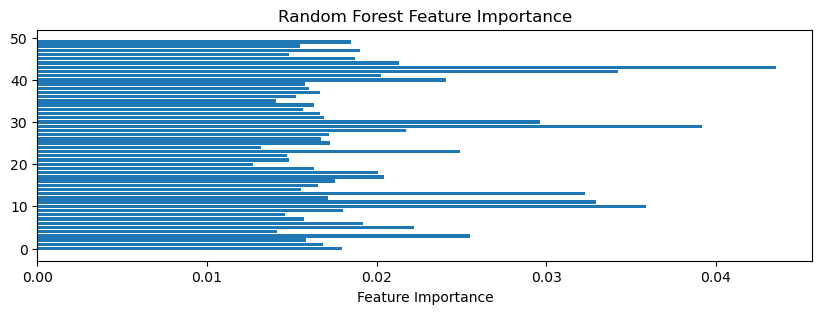

In [11]:
feature_importances = rf_classifier.feature_importances_
features = new_trainCorr_df.columns

# Visualize feature importances
plt.figure(figsize=(10, 3))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

## 10 FOLD Cross validation

(3090, 50)
(3090,)
Overall True Positives (TP): 2589
Overall False Positives (FP): 501
Overall ROC AUC (Weighted): 0.9763015420768782
Accuracy: 0.8378640776699029
Weighted Precision: 0.8397871438656146
Weighted Recall: 0.8378640776699029
Weighted F1-score: 0.8364482308062632


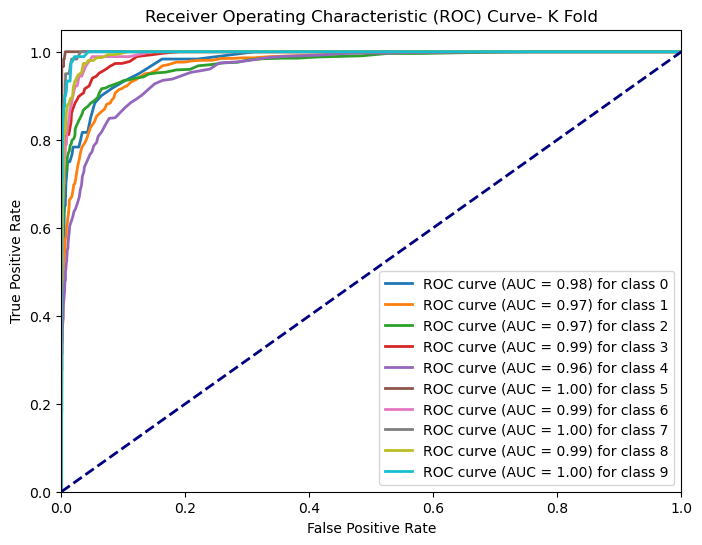

In [24]:


# Load a sample dataset (you can use your own dataset)
data = load_iris()
X = new_testCorr
print(X.shape)
y = testLabelArray
print(y.shape)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Define the number of folds for cross-validation (10-fold)
num_folds = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
y_scores = cross_val_predict(rf_classifier, X, y, cv=kf, method='predict_proba')
# Calculate overall TP and FP
conf_matrix = confusion_matrix(y, np.argmax(y_scores, axis=1))
TP = np.diag(conf_matrix).sum()
FP = conf_matrix.sum() - TP
# Calculate accuracy, precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y, np.argmax(y_scores, axis=1), average='weighted')


# Calculate ROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y))

for i in range(n_classes):
    y_true_class_i = (y == i)
    fpr[i], tpr[i], _ = roc_curve(y_true_class_i, y_scores[:, i])
    roc_auc[i] = roc_auc_score(y_true_class_i, y_scores[:, i])

# Calculate the overall ROC AUC
overall_roc_auc = roc_auc_score(y, y_scores, multi_class='ovr', average='weighted')

# Display the ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- K Fold')
plt.legend(loc='lower right')
# Display the overall evaluation scores
print("Overall True Positives (TP):", TP)
print("Overall False Positives (FP):", FP)
print("Overall ROC AUC (Weighted):", overall_roc_auc)
# Display the overall evaluation scores
print("Accuracy:", accuracy_score(y, np.argmax(y_scores, axis=1)))
print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1-score:", f1)
plt.show()

#### Plot Descision tress

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model with your data
rf_classifier.fit(new_trainCorr, trainLabelArray)  # Replace X and y with your data
feature_names= new_testCorr_df.columns.to_list()

# Visualize the individual decision trees
for tree_idx, tree in enumerate(rf_classifier.estimators_):
    #print(tree_idx)
    # Visualize each decision tree
    dot_data = export_graphviz(tree, out_file=None,
                               filled=True, rounded=True,
                               special_characters=True, feature_names=feature_names)
    
    graph = graphviz.Source(dot_data)
    graph.render(f"decision_tree_{tree_idx}")  # Create individual tree files, e.g., decision_tree_0.pdf

#### GENERALIZATION PARAMETER ---max_depth

In [34]:
# Define a range of max_depth values to experiment with
max_depth_values = [None, 10, 20, 30,100]  # You can customize this range

for max_depth in max_depth_values:
    # Create a Random Forest classifier with the specified max_depth
    rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    
    # Train the model with the training data
    rf_classifier.fit(new_trainCorr, trainLabelArray)
    
    # Predict on the test set
    y_pred = rf_classifier.predict(new_testCorr)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(testLabelArray, y_pred)
    report = classification_report(testLabelArray, y_pred, target_names=['0', '1','2','3','4','5', '6','7','8','9'])
    
    print(f"Max Depth: {max_depth}")
    print(f"Accuracy: {accuracy}")
    print(report)
   

Max Depth: None
Accuracy: 0.643042071197411
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        60
           1       0.68      0.70      0.69       720
           2       0.69      0.77      0.73       750
           3       0.76      0.78      0.77       450
           4       0.58      0.61      0.59       660
           5       0.75      0.20      0.32        60
           6       0.44      0.26      0.32        90
           7       0.35      0.43      0.39        60
           8       0.48      0.46      0.47       150
           9       0.23      0.18      0.20        90

    accuracy                           0.64      3090
   macro avg       0.60      0.45      0.46      3090
weighted avg       0.65      0.64      0.63      3090



/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/movina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max Depth: 10
Accuracy: 0.6203883495145631
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.63      0.74      0.68       720
           2       0.69      0.75      0.72       750
           3       0.69      0.70      0.69       450
           4       0.57      0.59      0.58       660
           5       0.67      0.10      0.17        60
           6       0.45      0.14      0.22        90
           7       0.38      0.40      0.39        60
           8       0.47      0.42      0.44       150
           9       0.24      0.12      0.16        90

    accuracy                           0.62      3090
   macro avg       0.48      0.40      0.41      3090
weighted avg       0.60      0.62      0.60      3090

Max Depth: 20
Accuracy: 0.640453074433657
              precision    recall  f1-score   support

           0       0.86      0.10      0.18        60
           1       0.68      0.72      0.70    

### GENERALIZATION PARAMETER ---min_sample_leaf

In [37]:

# Define a range of max_depth values to experiment with
min_sample_leaf_values = [3, 5, 10]  # You can customize this range


for min_sample_leaf in min_sample_leaf_values:
    # Create a Random Forest classifier with a specified min_samples_leaf value
    rf_classifier = RandomForestClassifier(n_estimators=100, min_samples_leaf=min_sample_leaf)
    
    # Train the model with the training data
    rf_classifier.fit(new_trainCorr, trainLabelArray)
    
    # Predict on the test set
    y_pred = rf_classifier.predict(new_testCorr)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(testLabelArray, y_pred)
    report = classification_report(testLabelArray, y_pred, target_names=['0', '1','2','3','4','5', '6','7','8','9'])
    
    print(f"Minimum sample leaf: {min_sample_leaf}")
    print(f"Accuracy: {accuracy}")
    print(report)

Minimum sample leaf: 3
Accuracy: 0.6275080906148868
              precision    recall  f1-score   support

           0       0.83      0.08      0.15        60
           1       0.68      0.70      0.69       720
           2       0.67      0.77      0.72       750
           3       0.73      0.76      0.75       450
           4       0.55      0.57      0.56       660
           5       0.40      0.07      0.11        60
           6       0.36      0.18      0.24        90
           7       0.39      0.43      0.41        60
           8       0.51      0.47      0.49       150
           9       0.25      0.19      0.22        90

    accuracy                           0.63      3090
   macro avg       0.54      0.42      0.43      3090
weighted avg       0.62      0.63      0.61      3090

Minimum sample leaf: 5
Accuracy: 0.6187702265372168
              precision    recall  f1-score   support

           0       1.00      0.13      0.24        60
           1       0.65     